In this notebook I will depict the heatmap and PCA based on X-chromosomal chunkcounts

In [1]:
import sys, os, re
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA
from sklearn import preprocessing

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")

Reading the data

In [3]:
chunkcounts_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/fs/chrX_run_linked_hap.chunkcounts.out"
metadata_path = "../data/Papio_metadata_with_clustering.txt"
chunkcounts = pd.read_csv(chunkcounts_path, sep=" ", header = 1, index_col=0)
metadata_samples = pd.read_csv(metadata_path, sep =" ")

Altering to match naming, and subset the metadata

In [7]:
in_df = metadata_samples.loc[metadata_samples["PGDP_ID"].isin(chunkcounts.index)]

In [8]:
sorted_origin = in_df.sort_values(by=["C_origin"])

In [9]:
sorted_origin["PGDP_ID"].values

array(['PD_0729', 'PD_0728', 'PD_0742', 'PD_0741', 'PD_0740', 'PD_0739',
       'PD_0735', 'PD_0734', 'PD_0743', 'PD_0732', 'PD_0731', 'PD_0720',
       'PD_0722', 'PD_0723', 'PD_0725', 'PD_0733', 'PD_0727', 'PD_0497',
       'PD_0498', 'PD_0502', 'PD_0504', 'PD_0505', 'PD_0508', 'PD_0654',
       'PD_0650', 'PD_0679', 'PD_0681', 'PD_0684', 'PD_0496', 'PD_0642',
       'PD_0494', 'PD_0201', 'PD_0266', 'PD_0202', 'PD_0204', 'PD_0207',
       'PD_0218', 'PD_0220', 'PD_0267', 'PD_0493', 'PD_0242', 'PD_0755',
       'PD_0753', 'PD_0752', 'PD_0748', 'PD_0747', 'PD_0763', 'PD_0227',
       'PD_0223', 'PD_0217', 'PD_0215', 'PD_0746', 'PD_0757', 'PD_0756',
       'PD_0762', 'PD_0764', 'PD_0766', 'PD_0767', 'PD_0768', 'PD_0771',
       'PD_0775', 'PD_0269', 'PD_0268', 'PD_0761', 'PD_0637', 'PD_0236',
       'PD_0235', 'PD_0687', 'PD_0688', 'PD_0689', 'PD_0690', 'PD_0691',
       'PD_0230', 'PD_0233', 'PD_0228', 'PD_0658', 'PD_0234', 'PD_0231',
       'PD_0229', 'PD_0707', 'PD_0718', 'PD_0697', 

In [11]:
sorted_chunks = chunkcounts.reindex(sorted_origin["PGDP_ID"])
sorted_chunks = sorted_chunks.reindex(columns=sorted_origin["PGDP_ID"])
sorted_chunks = sorted_chunks.set_index([])

Color palette

In [72]:
palette = sns.color_palette()
color_mapping = dict(zip(sorted_origin.C_origin.unique(), palette))
cluster_colors = sorted_origin["C_origin"].map(color_mapping)

In [73]:
cluster_colors

161    (0.2980392156862745, 0.4470588235294118, 0.690...
160    (0.2980392156862745, 0.4470588235294118, 0.690...
174    (0.2980392156862745, 0.4470588235294118, 0.690...
173    (0.2980392156862745, 0.4470588235294118, 0.690...
172    (0.2980392156862745, 0.4470588235294118, 0.690...
                             ...                        
73     (0.8549019607843137, 0.5450980392156862, 0.764...
74     (0.8549019607843137, 0.5450980392156862, 0.764...
75     (0.8549019607843137, 0.5450980392156862, 0.764...
70     (0.8549019607843137, 0.5450980392156862, 0.764...
124    (0.5490196078431373, 0.5490196078431373, 0.549...
Name: C_origin, Length: 124, dtype: object

Merging to create a full dataframe

The plot itself

In [74]:
pop_df = in_df.set_index('PGDP_ID') # Making a df with the individual names as index 
species = pop_df['C_origin'] # Extracting the column with the 'C_origin'
species_reindexed = species.reindex(chunkcounts.index) # Reindexing this to match the data
fs_new = pd.merge(chunkcounts, species_reindexed, left_index=True, right_index=True)
fs_new = fs_new.set_index([fs_new.index, 'C_origin'])
fs_new = fs_new.sort_index(level='C_origin')
fs_new.index = fs_new.index.droplevel(1)
fs_new = fs_new.reindex(columns=list(fs_new.index))

species_reindexed = species.reindex(fs_new.index)

In [75]:
clusters = species_reindexed.unique()
palette = sns.color_palette("tab10")
color_mapping = dict(zip(clusters, palette))
cluster_colors = species_reindexed.map(color_mapping)

In [76]:
species_reindexed

Recipient
PD_0720    Anubis, Ethiopia
PD_0722    Anubis, Ethiopia
PD_0723    Anubis, Ethiopia
PD_0725    Anubis, Ethiopia
PD_0727    Anubis, Ethiopia
                 ...       
PD_0398      Papio, Senegal
PD_0399      Papio, Senegal
PD_0400      Papio, Senegal
PD_0401      Papio, Senegal
PD_0692     Ursinus, Zambia
Name: C_origin, Length: 124, dtype: object

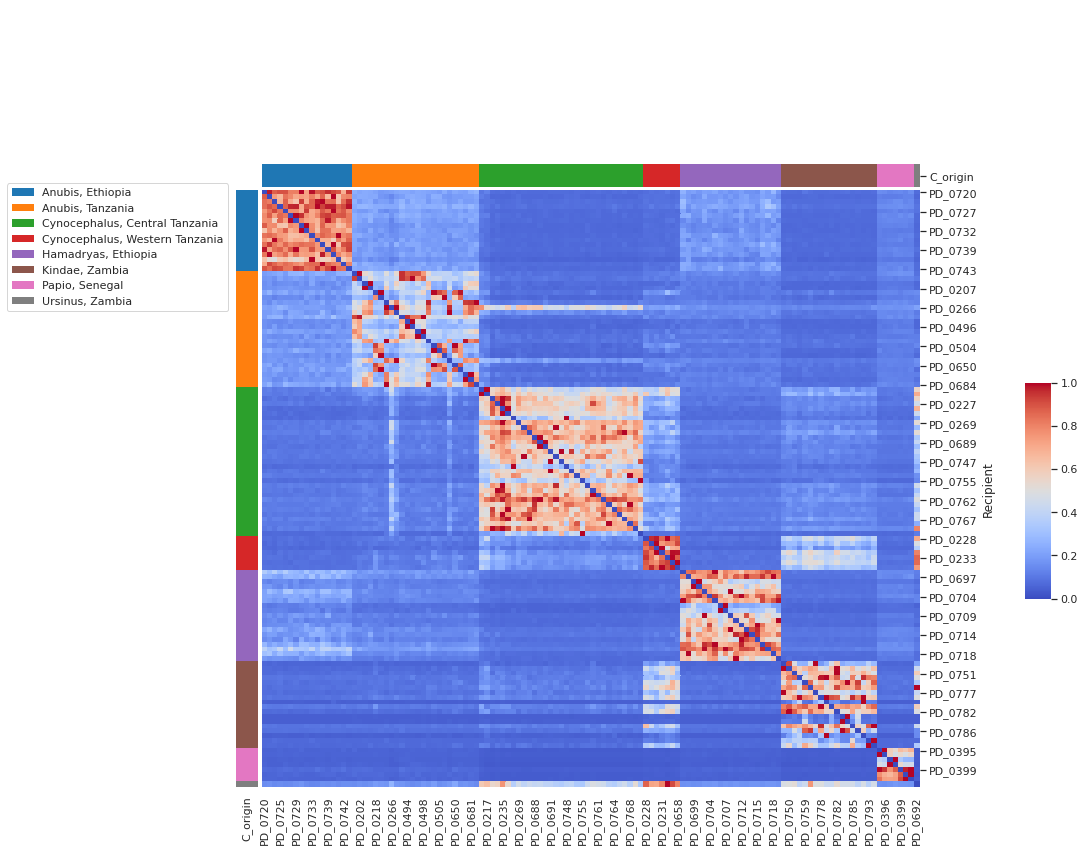

In [80]:
g = sns.clustermap(fs_new, cmap = 'coolwarm',
               row_colors=cluster_colors, col_colors=cluster_colors,
               row_cluster=False, col_cluster = False, # This is set to be false to preserve the order of the individuals
               standard_scale = 0, dendrogram_ratio=(.1, .2),
               cbar_pos=(1.02, .3, .03, .25), figsize=(12, 12))

for label in clusters:
    g.ax_row_dendrogram.bar(0, 0, color=color_mapping[label],
                            label=label, linewidth=0)

g.ax_row_dendrogram.legend(bbox_to_anchor=(1.02, 1.02)) #, bbox_to_anchor=(0.9, 0.5)

In [10]:
chunkcounts

,PD_0215,PD_0217,PD_0223,PD_0227,PD_0228,PD_0229,PD_0230,PD_0231,PD_0233,PD_0234,...,PD_0718,PD_0719,PD_0395,PD_0396,PD_0397,PD_0398,PD_0399,PD_0400,PD_0401,PD_0692
0,0.000000,624.805431,218.158012,236.521271,147.264208,150.055644,144.180639,208.670263,294.173179,222.036516,...,30.451731,34.673462,34.273225,36.349818,32.649470,29.577128,29.340478,36.879847,34.258318,204.972029
1,704.380672,0.000000,243.364884,332.161163,227.810235,162.836250,179.252377,221.799393,252.907647,192.740659,...,42.403506,42.012273,42.514196,45.559119,38.453409,46.257441,38.811008,40.781080,44.273426,283.868164
2,250.770988,223.198126,0.000000,397.958111,76.890660,68.000780,69.223854,74.836757,83.429938,96.715255,...,30.988053,28.727079,25.702586,26.652249,30.713245,36.294931,34.422151,32.008170,28.052799,202.356242
3,216.102649,269.575352,375.439959,0.000000,79.446257,75.229373,86.401140,107.373567,121.400956,123.441391,...,34.439470,30.186139,32.929823,30.786890,30.902958,29.243193,32.435121,33.916279,34.283291,173.269664
4,163.377320,233.758773,87.667005,99.995510,0.000000,839.668324,859.496670,593.689047,704.487765,607.224586,...,38.128586,38.428081,44.315865,45.346991,46.220883,47.262346,48.908733,44.204407,53.140800,406.862999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,5.324559,7.082042,3.038824,4.641234,8.756350,5.384287,6.995031,4.656886,5.662726,6.149226,...,13.086608,14.570494,484.326915,566.571918,1073.795710,0.000000,621.894544,522.761655,552.636293,12.240993
122,4.611559,7.032681,7.154391,4.179099,6.493765,5.523733,5.121089,4.964277,4.326787,5.755015,...,14.862839,16.501845,640.277312,743.076912,685.699041,593.181157,0.000000,747.365995,775.823552,8.805948
123,5.243448,6.661332,3.512188,4.739055,6.541252,5.965695,6.609375,7.696121,6.580491,6.278975,...,17.270961,19.231776,670.425432,674.603804,592.916153,527.895389,764.422840,0.000000,929.502117,12.345582
124,6.350419,7.025065,3.581909,3.691480,6.298776,6.361959,4.755345,6.022072,8.474585,5.970736,...,15.366022,17.277040,677.933023,671.812362,610.499164,554.328426,806.261123,928.628713,0.000000,11.761887


In [54]:
species_reindexed

Recipient
PD_0215    Cynocephalus, Central Tanzania
PD_0217    Cynocephalus, Central Tanzania
PD_0223    Cynocephalus, Central Tanzania
PD_0227    Cynocephalus, Central Tanzania
PD_0228    Cynocephalus, Western Tanzania
                        ...              
PD_0398                    Papio, Senegal
PD_0399                    Papio, Senegal
PD_0400                    Papio, Senegal
PD_0401                    Papio, Senegal
PD_0692                   Ursinus, Zambia
Name: C_origin, Length: 124, dtype: object

In [59]:
fs_new

,PD_0720,PD_0722,PD_0723,PD_0725,PD_0727,PD_0728,PD_0729,PD_0731,PD_0732,PD_0733,...,PD_0793,PD_0794_BAB,PD_0395,PD_0396,PD_0397,PD_0398,PD_0399,PD_0400,PD_0401,PD_0692
Recipient,,,,,,,,,,,,,,,,,,,,,
PD_0720,0.000000,93.185281,83.258523,85.762312,85.592069,77.235579,77.220334,95.258900,69.508879,94.072655,...,7.251584,7.652968,14.552600,14.221520,12.660379,13.621239,14.067487,12.738236,15.003211,7.229403
PD_0722,98.490981,0.000000,83.164669,74.609604,93.471271,88.275834,79.642294,83.161464,80.969425,90.645895,...,8.052162,7.917940,13.909149,13.072589,12.910237,12.677326,13.408448,14.480999,14.606987,7.394641
PD_0723,81.572126,78.646721,0.000000,65.500068,84.523615,67.971565,60.597337,90.570194,67.070612,84.542591,...,7.639214,7.503843,13.188848,13.130120,13.789501,15.439508,15.233023,12.997360,14.177934,8.049513
PD_0725,81.495039,86.813747,82.841490,0.000000,84.085707,93.440068,93.814382,68.249210,86.658389,84.119197,...,8.487961,8.327558,14.879650,14.916227,15.470741,15.323977,16.138601,14.880578,14.569379,9.321088
PD_0727,76.246793,85.306636,93.606271,84.734382,0.000000,79.432426,79.293313,70.252168,95.567226,71.796419,...,7.168421,7.066571,12.156622,12.017149,12.741854,14.283452,11.711836,12.737886,11.852444,9.267203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PD_0398,8.277140,7.576414,7.644746,7.248167,8.881833,7.734199,7.818621,7.657578,8.710453,7.752008,...,5.502400,5.372109,72.025228,65.799963,151.210477,0.000000,81.886092,68.008924,68.899495,4.986850
PD_0399,9.039313,8.730418,8.316501,9.100483,10.143972,9.516376,8.610821,9.522912,9.326994,9.232852,...,6.117875,6.343693,125.865770,119.561905,96.850825,111.303258,0.000000,123.418215,126.674362,5.635604
PD_0400,8.638387,9.096468,8.691742,10.156785,9.019699,8.845804,9.862419,8.959700,8.628604,8.439101,...,6.295062,5.786532,114.533136,102.853638,98.562975,107.164087,130.147900,0.000000,147.605137,5.692382


In [61]:
species_reindexed

Recipient
PD_0720    Anubis, Ethiopia
PD_0722    Anubis, Ethiopia
PD_0723    Anubis, Ethiopia
PD_0725    Anubis, Ethiopia
PD_0727    Anubis, Ethiopia
                 ...       
PD_0398      Papio, Senegal
PD_0399      Papio, Senegal
PD_0400      Papio, Senegal
PD_0401      Papio, Senegal
PD_0692     Ursinus, Zambia
Name: C_origin, Length: 124, dtype: object

PCA

In [94]:
pca = PCA(n_components=10)
X_normalized = preprocessing.normalize(sorted_chunks, norm='l2')
projection = pca.fit_transform(X_normalized)

print(pca.explained_variance_)

[0.15246303 0.08708859 0.06924016 0.04780758 0.0394586  0.01184276
 0.01013831 0.00546018 0.00481922 0.00435389]


In [108]:
merged_chunk_meta = pd.merge(sorted_chunks, in_df, on="PGDP_ID")

[Text(0.5, 0, 'pc1'), Text(0, 0.5, 'pc2')]

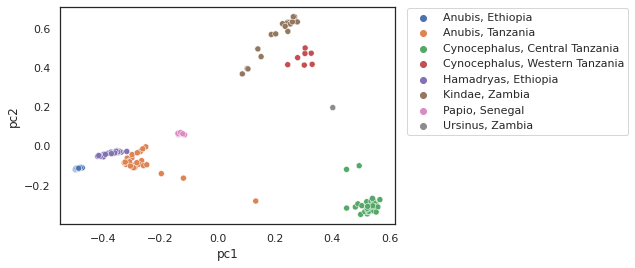

In [111]:
pcx, pcy = 0, 1
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"])
g.legend(bbox_to_anchor=(1.02, 1.02))
g.set(xlabel="pc{}".format(pcx+1), ylabel="pc{}".format(pcy+1))

[Text(0.5, 0, 'pc3'), Text(0, 0.5, 'pc4')]

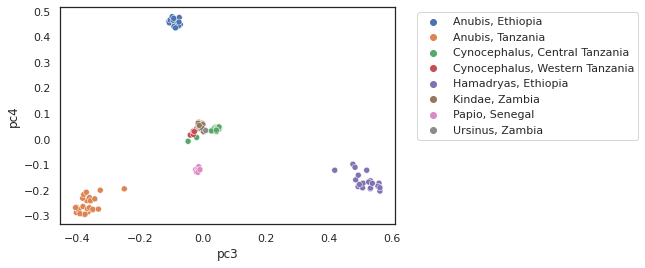

In [114]:
pcx, pcy = 2, 3
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"])
g.legend(bbox_to_anchor=(1.05, 1))
g.set(xlabel="pc{}".format(pcx+1), ylabel="pc{}".format(pcy+1))

In [70]:
cluster_colors

Recipient
PD_0720    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0722    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0723    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0725    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0727    (0.12156862745098039, 0.4666666666666667, 0.70...
                                 ...                        
PD_0398    (0.8901960784313725, 0.4666666666666667, 0.760...
PD_0399    (0.8901960784313725, 0.4666666666666667, 0.760...
PD_0400    (0.8901960784313725, 0.4666666666666667, 0.760...
PD_0401    (0.8901960784313725, 0.4666666666666667, 0.760...
PD_0692    (0.4980392156862745, 0.4980392156862745, 0.498...
Name: C_origin, Length: 124, dtype: object